In [77]:
!python data_fetcher.py


100%|##########| 8000/8000 [00:01<00:00, 6307.91it/s] 


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib # To save our scaler for later use

# 1. Loading of Data
df = pd.read_excel('Data/train(1).xlsx')

# 2. Basic Cleaning
cols_to_use = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 
               'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
               'grade', 'sqft_above', 'sqft_basement', 'lat', 'long', 
               'sqft_living15', 'sqft_lot15']

df = df[cols_to_use]

# 3. Target Transformation
df['price_log'] = np.log1p(df['price'])

# 4. Feature Engineering
df['total_sqft'] = df['sqft_living'] + df['sqft_lot']

print("Data Loaded. Shape:", df.shape)
df.head()

Data Loaded. Shape: (16209, 19)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,price_log,total_sqft
0,9117000170,268643,4,2.25,1810,9240,2.00,0,0,3,7,1810,0,47.44,-122.19,1660,9240,12.50,11050
1,6700390210,245000,3,2.50,1600,2788,2.00,0,0,4,7,1600,0,47.40,-122.19,1720,3605,12.41,4388
2,7212660540,200000,4,2.50,1720,8638,2.00,0,0,3,8,1720,0,47.27,-122.31,1870,7455,12.21,10358
3,8562780200,352499,2,2.25,1240,705,2.00,0,0,3,7,1150,90,47.53,-122.07,1240,750,12.77,1945
4,7760400350,232000,3,2.00,1280,13356,1.00,0,0,3,7,1280,0,47.37,-122.07,1590,8071,12.35,14636


In [109]:

eda_df = df.copy()

print(" Training Dataset Summary Statistics (Physical Units) ")
train_stats_raw = eda_df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition']].describe()

pd.options.display.float_format = '{:.2f}'.format
print(train_stats_raw)

 Training Dataset Summary Statistics (Physical Units) 
           price  bedrooms  bathrooms  sqft_living   sqft_lot    grade  \
count   16209.00  16209.00   16209.00     16209.00   16209.00 16209.00   
mean   537470.28      3.37       2.11      2073.27   14867.67     7.65   
std    360303.58      0.93       0.77       907.01   38825.70     1.17   
min     75000.00      0.00       0.00       290.00     520.00     1.00   
25%    320000.00      3.00       1.50      1430.00    5004.00     7.00   
50%    450000.00      3.00       2.25      1910.00    7599.00     7.00   
75%    640000.00      4.00       2.50      2550.00   10631.00     8.00   
max   7700000.00     33.00       8.00     12050.00 1164794.00    13.00   

       condition  
count   16209.00  
mean        3.41  
std         0.65  
min         1.00  
25%         3.00  
50%         3.00  
75%         4.00  
max         5.00  


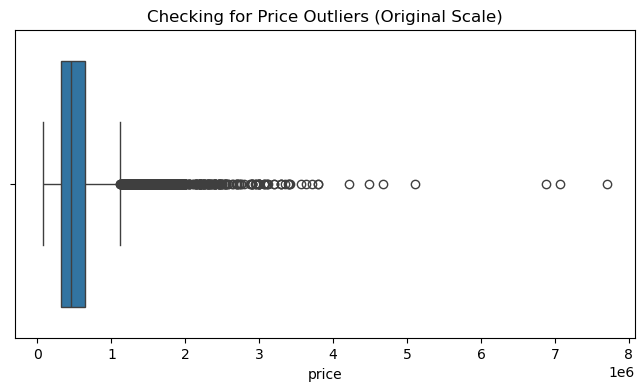

In [99]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Checking for Price Outliers (Original Scale)')
plt.show()

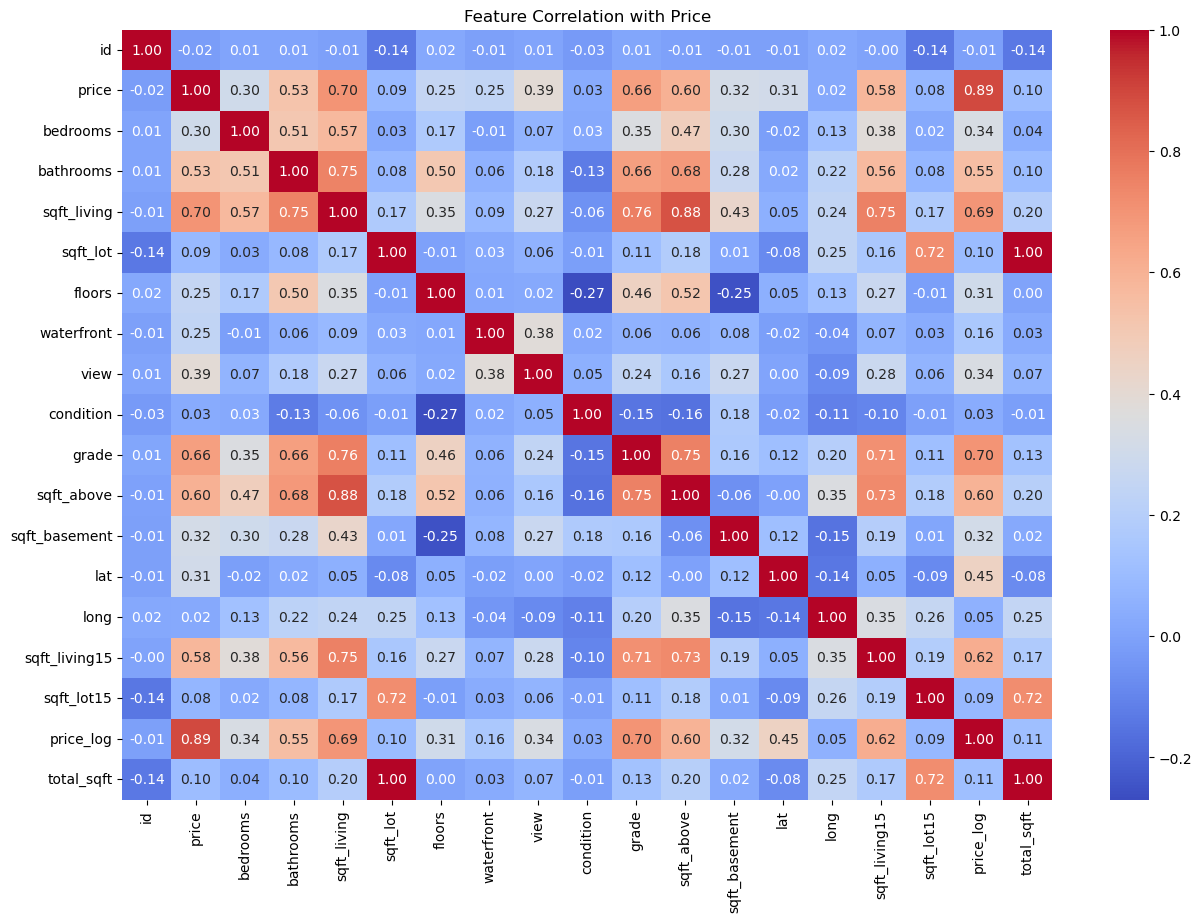

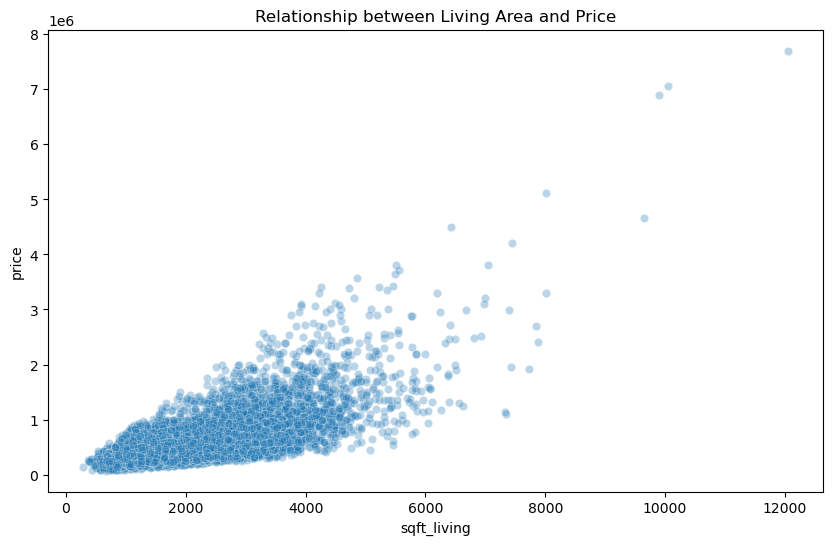

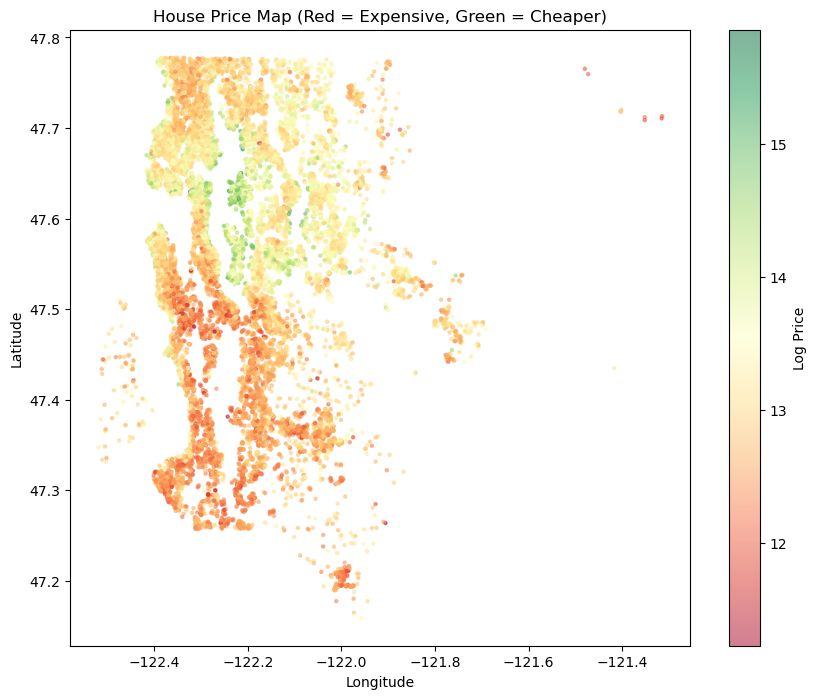

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation with Price')
plt.show()

# 2. Price vs Square Footage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.3)
plt.title('Relationship between Living Area and Price')
plt.show()

# 3. Geographical Heatmap 
plt.figure(figsize=(10, 8))
plt.scatter(df['long'], df['lat'], c=df['price_log'], cmap='RdYlGn', s=5, alpha=0.5)
plt.colorbar(label='Log Price')
plt.title('House Price Map (Red = Expensive, Green = Cheaper)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

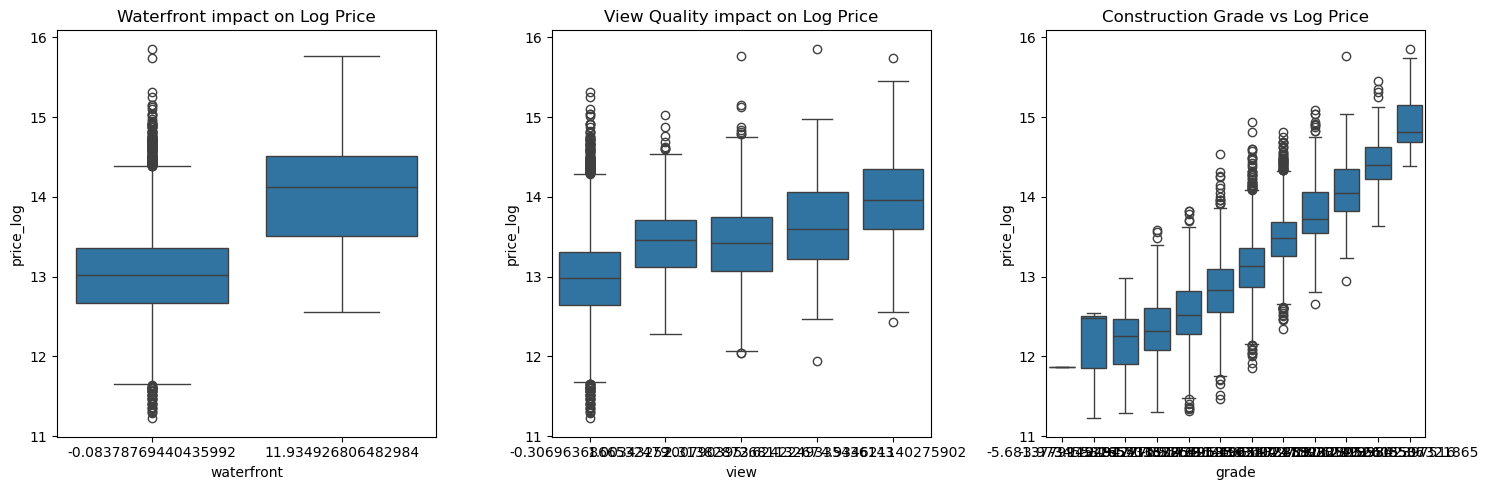

In [87]:
plt.figure(figsize=(15, 5))

# Plot 1: Waterfront vs Price
plt.subplot(1, 3, 1)
sns.boxplot(x='waterfront', y='price_log', data=df)
plt.title('Waterfront impact on Log Price')

# Plot 2: View quality vs Price
plt.subplot(1, 3, 2)
sns.boxplot(x='view', y='price_log', data=df)
plt.title('View Quality impact on Log Price')

# Plot 3: Grade vs Price
plt.subplot(1, 3, 3)
sns.boxplot(x='grade', y='price_log', data=df)
plt.title('Construction Grade vs Log Price')

plt.tight_layout()
plt.show()

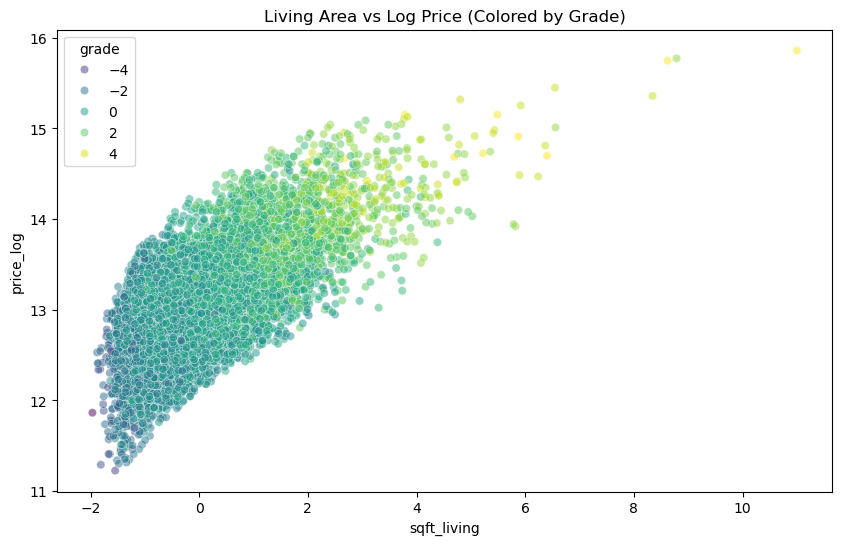

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sqft_living', y='price_log', hue='grade', palette='viridis', alpha=0.5)
plt.title('Living Area vs Log Price (Colored by Grade)')
plt.show()

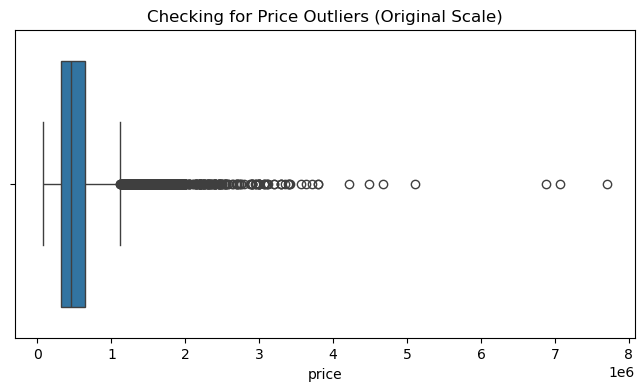

In [91]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.title('Checking for Price Outliers (Original Scale)')
plt.show()

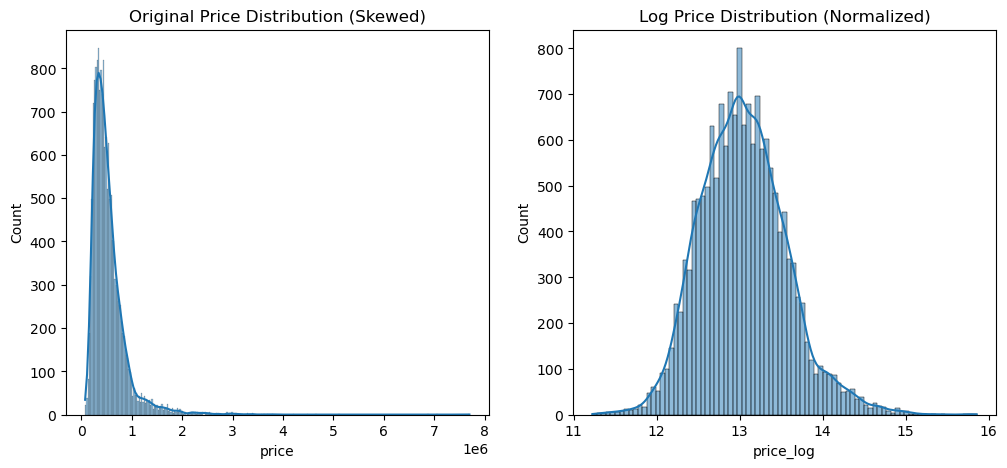

In [83]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Original Price Distribution (Skewed)')

plt.subplot(1, 2, 2)
sns.histplot(df['price_log'], kde=True)
plt.title('Log Price Distribution (Normalized)')

plt.show()

In [85]:

features = [c for c in df.columns if c not in ['id', 'price', 'price_log']]

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])


df.to_csv('Data/cleaned_data.csv', index=False)
joblib.dump(scaler, 'Data/scaler.pkl') 

print("Preprocessed data saved to Data/cleaned_data.csv")

Preprocessed data saved to Data/cleaned_data.csv
